In [1]:
import praw
import collections
import seaborn as sns

<H1>List of ABC's The Bachelorette Contestants</H1>

In [2]:
menList = [
    'brian',
    'cam',
    'chasen',
    'connor j',
    'connor s',
    'daron',
    'devin',
    'dustin',
    'dylan',
    'garret',
    'grant',
    'hunter',
    'jed',
    'joe',
    'joey',
    'john paul jones',
    'jpj',
    'jonathan',
    'kevin',
    'luke p',
    'luke s',
    'matt donald',
    'matteo',
    'matthew',
    'mike',
    'peter',
    'ryan',
    'scott',
    'thomas',
    'tyler c',
    'tyler g',
    ];

# create list of counter variables
cnts = [0]*len(menList)

# zip into dictionary
menDict = dict(zip(menList, cnts))

<H1> Parse TheBachelor Subreddit for Posts </H1>

In [3]:
reddit = praw.Reddit(client_id='', client_secret='', user_agent='')

In [4]:
# get hottest posts from all subreddits
hot_posts = reddit.subreddit('TheBachelor').hot(limit=1000)
# instantiate our post dictionary
postDict = {
    "title":[],
    "score":[],
    "id":[],
    "url":[], 
    "comms_num": [],
    "created": [],
    "body":[]
    }
# loop over all men's names in the title of all posts
for post in hot_posts: #grab data for our csv file
    postDict["title"].append(post.title)
    postDict["score"].append(post.score)
    postDict["id"].append(post.id)
    postDict["url"].append(post.url)
    postDict["comms_num"].append(post.num_comments)
    postDict["created"].append(post.created)
    postDict["body"].append(post.selftext)
    for man, cnt in menDict.items():
        if man in post.title.lower():
            menDict[man] = menDict[man] + 1
    

In [5]:
# Correct for John Paul Jones nickname, Domain knowledge FTW
menDict['john paul jones'] = menDict['john paul jones'] + menDict.pop('jpj', 0)
# sort the dictionary
sortedMen = sorted(menDict.items(), key=lambda kv: kv[1], reverse=True)
sortedDict = collections.OrderedDict(sortedMen)

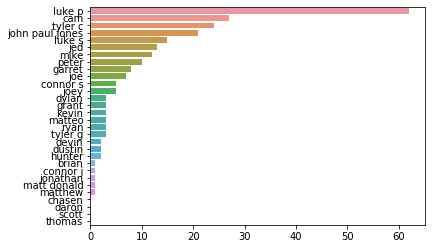

In [6]:
ax = sns.barplot(x=list(sortedDict.values()), y=list(sortedDict.keys()))

<H1> Package the postDict into Pandas dataframe and save to CSV-file </H1>

In [7]:
import pandas as pd

In [8]:
PostData = pd.DataFrame(postDict)
PostData.head()

,title,score,id,url,comms_num,created,body
0,Megathread Hub - Bachelorette S15E4,34,bwlwh1,https://www.reddit.com/r/thebachelor/comments/...,30,1.559662e+09,**Live Discussion Threads:**\n\n[East/Central]...
1,Off-topic thread June 7-13,16,bxwc6g,https://www.reddit.com/r/thebachelor/comments/...,273,1.559952e+09,This thread is for any and all of our off-topi...
2,That’s all.,814,byuuaj,https://i.redd.it/pcmb0gq2dh331.jpg,13,1.560180e+09,
3,Guess we will be seeing ______ in paradise 😏😏😏,78,byzj2f,https://i.redd.it/rezipml5xj331.jpg,57,1.560211e+09,
4,Tyler C. is that you?,88,byyjx7,https://i.imgur.com/wtVTZLz.gifv,10,1.560206e+09,


In [9]:
import datetime as dt

In [33]:
_timestamp = PostData["created"].apply(dt.datetime.fromtimestamp)
PostData = PostData.assign(timestamp = _timestamp)
now = dt.datetime.now()

PostData.to_csv('theBachlorette_' + str(now.day) + '_' + str(now.year) + '.csv', index=False)

,title,score,id,url,comms_num,created,body,timestamp
0,Megathread Hub - Bachelorette S15E4,34,bwlwh1,https://www.reddit.com/r/thebachelor/comments/...,30,1.559662e+09,**Live Discussion Threads:**\n\n[East/Central]...,2019-06-04 11:21:45
1,Off-topic thread June 7-13,16,bxwc6g,https://www.reddit.com/r/thebachelor/comments/...,273,1.559952e+09,This thread is for any and all of our off-topi...,2019-06-07 20:03:27
2,That’s all.,814,byuuaj,https://i.redd.it/pcmb0gq2dh331.jpg,13,1.560180e+09,,2019-06-10 11:20:22
3,Guess we will be seeing ______ in paradise 😏😏😏,78,byzj2f,https://i.redd.it/rezipml5xj331.jpg,57,1.560211e+09,,2019-06-10 19:56:28
4,Tyler C. is that you?,88,byyjx7,https://i.imgur.com/wtVTZLz.gifv,10,1.560206e+09,,2019-06-10 18:32:15
